<a href="https://colab.research.google.com/github/gannannavelorange/575/blob/master/src/P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gannannavelorange/575

Cloning into '575'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 146 (delta 3), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (146/146), 689.54 KiB | 12.10 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [2]:
cd 575/src/data

/content/575/src/data


In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import csv
import statsmodels.api as sm
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chisquare


In [10]:
data=pd.read_csv("GOOG1.csv",header=None)
list=data.values.tolist()
#list=np.array(list)
print(list)


[['Adj Close'], ['550.518555'], ['546.499573'], ['541.074463'], ['534.063721'], ['535.295349'], ['535.549622'], ['540.127075'], ['539.299377'], ['538.531433'], ['537.693787'], ['528.937805'], ['531.07196'], ['532.33844'], ['522.615173'], ['533.914124'], ['532.507996'], ['537.888245'], ['545.502319'], ['563.512878'], ['555.369995'], ['553.679993'], ['549.080017'], ['537.340027'], ['537.900024'], ['540.780029'], ['530.799988'], ['524.219971'], ['530.700012'], ['538.219971'], ['535.700012'], ['529.039978'], ['529.619995'], ['538.400024'], ['533.849976'], ['532.299988'], ['537.359985'], ['539.27002'], ['542.51001'], ['540.109985'], ['532.320007'], ['539.789978'], ['539.780029'], ['532.109985'], ['533.98999'], ['539.179993'], ['540.309998'], ['536.700012'], ['533.330017'], ['526.830017'], ['526.690002'], ['536.690002'], ['534.609985'], ['532.330017'], ['527.200012'], ['528.150024'], ['529.26001'], ['536.72998'], ['536.690002'], ['538.190002'], ['540.47998'], ['537.840027'], ['535.22998'], [

In [0]:
g1=[]
with open('GOOG1.csv') as file:
      reader=csv.reader(file)
      for row in reader:
        #g1.append(int(row['Adj Close']))
        #DApp=[row[1] for row in rows[1:49]]
        DApp=[float(dapp) for dapp in DApp]
        print(g1)
        google=[row[0] for row in rows[1:699]reader]
        google=[float(dapp) for dapp in DApp]
        google=np.array(google)
        #home_team_goals.append(int(row['Home Team Goals']))
        print(google)
        #mu_loss=np.mean([float(row) for row in rows[1:1008]] )
        #variance=np.var([float(row) for row in rows[1:1008]])

In [0]:
def correlation(M):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      D=[row[0] for row in rows[1:1260]]
      D=[float(d) for d in D]
      return D
      #print(D)
    #print(D[0])

In [38]:
x=correlation('GOOG1')
y=correlation('FB1')
np.corrcoef(x, y)

array([[1.        , 0.93855025],
       [0.93855025, 1.        ]])

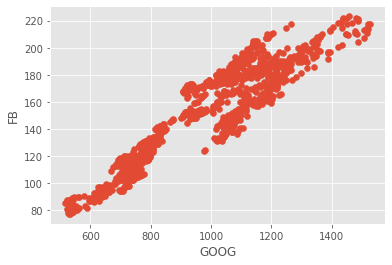

In [42]:
matplotlib.style.use('ggplot')

plt.scatter(x, y)
plt.xlabel('GOOG')
plt.ylabel('FB')
plt.show()


In [0]:
mu=np.zeros(11)
names=['CAT','DIA','HD','MSFT','NKE','NVDA','PG','TM','VIG','VOO','WMT']
def getData(n=None):
    Is=[i for i in range(11)]
    Rows=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[2] for row in reader]
        mu[i]=np.mean([float(row) for row in rows[1:n]])
        Rows.append([float(row) for row in rows[1:n]])
    Omega=np.cov(np.array(Rows))
    return mu,Omega

In [0]:
def lin_loss(Vt,Wt,mu,omega):
  exp=-Vt*(np.dot(Wt,mu))
  var=(Vt**2)*(np.dot(np.dot(Wt,omega),Wt))
  return exp,var

In [0]:
'''
def loss(Vt,Wt,mu,omega):
  exp=-Vt*(np.dot(Wt,np.exp(mu))-np.dot(mu,np.ones(11)))
  var=(Vt**2)*(np.dot(np.dot(Wt,omega),Wt))
  return exp,var

In [53]:
mu1=np.array(getData(1006)[0])     #1007 20151231 1/1 LOG RETURN
omega1=np.array(getData(1006)[1])
vt=186.3273                  #20141231 portfolio value
wt=np.ones(11)*1/11
a=lin_loss(vt,wt,mu1,omega1)
exp=a[0]
var=a[1]
print(exp)
print(var)


-0.1076628378392295
2.2035997418749744


In [0]:
'''mu1=np.array(getData(1006)[0])*21     #1007 20151231 1/1 LOG RETURN
omega1=np.array(getData(1006)[1])*21
#print(omega)
vt=186.3273                           #20151231 portfolio value
wt=np.ones(11)*1/11
b=lin_loss(vt,wt,mu1,omega1)
ex=b[0]
va=b[1]
print(ex)
print(va)

In [0]:
'''
mu=getData(1006)[0]
print(mu)
omega=getData(1008)[1]

In [0]:
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

In [0]:
'''
with open('loss.csv') as file:
      reader=csv.reader(file)
      rows=[row[1] for row in reader]
      #print(rows)
      mu_loss=np.mean([float(row) for row in rows[1:1008]] )
      variance=np.var([float(row) for row in rows[1:1008]])
      

Text(0.5, 1.0, 'pdf of linearized loss distribution')

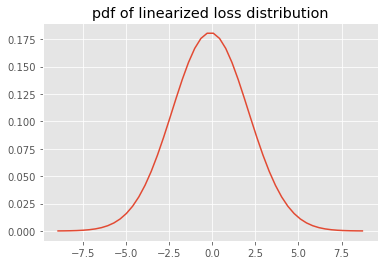

In [55]:
x = np.linspace (exp-4*var, exp+4*var)
y = normfun(x, exp, var)
plt.plot(x,y)
plt.title('pdf of linearized loss distribution')


In [0]:
#48  ??????????

Text(0.5, 1.0, 'cdf of linearized loss distribution')

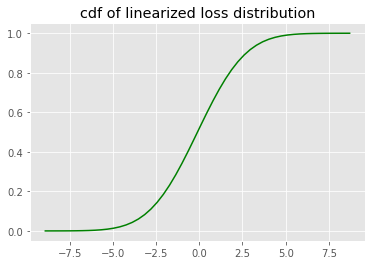

In [56]:
plt.plot(x, norm.cdf (x, exp, var),'g')
plt.title('cdf of linearized loss distribution')

In [47]:
#loss distribution
Names=['loss1']
for name in Names:
    with open(name+'.csv') as file:
        reader=csv.reader(file)
        rows=[row for row in reader]
    DApp=[row[1] for row in rows[1:49]]
    DApp=[float(dapp) for dapp in DApp]
   #DApp=[math.log(DApp[i]/DApp[i-1]) for i in range(1,len(DApp))]
    DApp=sorted(DApp)
    DApp=np.array(DApp)
    mu_loss,sigma_loss=norm.fit(DApp)
    #_,p=chisquare(DApp,norm(mu,sigma).pdf(np.linspace(-50,50,251)))
    #print('The p value for '+name+' is %f'%p)
    print(mu_loss,sigma_loss)
    #print(sigma)
    #mu_t,sigma_t,n=t.fit(DApp)


-1.7984855032291662 4.2000145923233


Text(0.5, 1.0, 'pdf of  loss distribution')

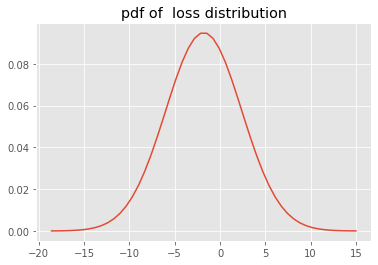

In [50]:
#x_loss = np.arange(-0.002,0.0001,0.00001) 
x_loss=np.linspace (mu_loss-4*sigma_loss, mu_loss+4*sigma_loss)
y_loss = normfun(x_loss, mu_loss, sigma_loss)
plt.plot(x_loss,y_loss)
#plt.hist(DApp,bins=48,density='true')
plt.title('pdf of  loss distribution')

Text(0.5, 1.0, 'cdf of  loss distribution')

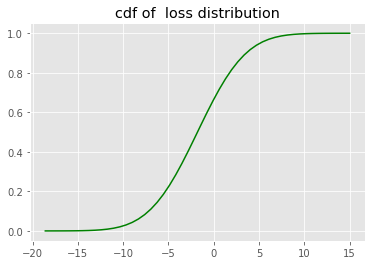

In [51]:
plt.plot(x_loss, norm.cdf (x_loss,mu_loss,sigma_loss),'g')
plt.title('cdf of  loss distribution')

In [0]:
# t-distribution

In [0]:
np.random.seed(1)
ks = t.fit(DApp)
df = ks[0]
#print(df)
loc = ks[1]
#print(loc)
scale = ks[2]
#print(scale)
ks2 = t.rvs(df=df,loc=loc,scale=scale,size=len(DApp))
ss.ks_2samp(DApp,ks2)

14.3850254761902
-0.01806816981166321
0.03905790850349124


Ks_2sampResult(statistic=0.14583333333333334, pvalue=0.6926601395134386)

Text(0.5, 1.0, 'pdf of T-Distribution')

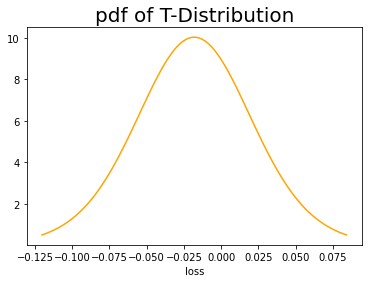

In [0]:
plt.figure()
TDistribution = ss.t(ks[0],ks[1],ks[2])
x = np.linspace(TDistribution.ppf(0.01), TDistribution.ppf(0.99), 100)
plt.plot(x, TDistribution.pdf(x),c='orange')
plt.xlabel('loss')
plt.title('pdf of T-Distribution',size=20)



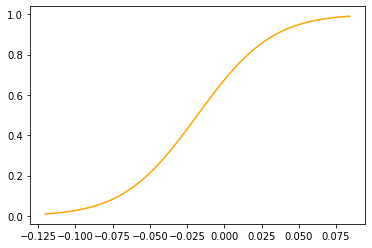

In [0]:
plt.plot(x, TDistribution.cdf(x),c='orange')

In [0]:
#problem3

In [0]:
with open('loss.csv') as file:
      reader=csv.reader(file)
      values=[row[0] for row in reader]
      values_future=[float(row) for row in values[1007:2013]]
      #print(values_future)
      

In [0]:
with open('loss.csv') as file:
      reader=csv.reader(file)
      log_returns=[row[2] for row in reader]
      log_returns_future=[float(row) for row in log_returns[1007:2013]]
      #print(log_returns_future)

No handles with labels found to put in legend.


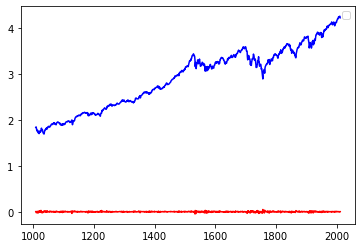

In [0]:
X=np.arange(1008,2013,1)
plt.plot(X,values_future,'b')
plt.plot(X,log_returns_future,'r')
plt.legend()

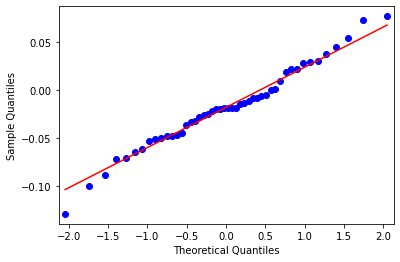

In [0]:

import pylab
sm.qqplot(DApp, line='s')
pylab.show()

In [0]:
'''
x = np.arange(-0.05, 0.125, 0.005)

y = TDistribution.cdf(x)

plt.plot(x, y)

sorted_ = np.sort(DApp)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

x_label = t.ppf(yvals)
plt.scatter(x_label, sorted_)

ss.probplot(DApp, dist="t", plot=plt)
print('QQ plot for t distribution')
plt.show()

In [0]:
#3(d) rolling window for linearized loss
mu=np.zeros(11)
names=['CAT','DIA','HD','MSFT','NKE','NVDA','PG','TM','VIG','VOO','WMT']
def getData1(M):
    Is=[i for i in range(11)]
    Rows=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[2] for row in reader]
        mu[i]=np.mean([float(row) for row in rows[1+21*M:1006+21*M]])
        Rows.append([float(row) for row in rows[1+21*M:1006+21*M]])
    Omega=np.cov(np.array(Rows))
    return mu,Omega

In [0]:

for M in range(48):
  data= getData1(M+1)
  mu=data[0]
  omega=data[1]
  vt=values_future[M]
  a=lin_loss(vt,wt,mu,omega)
  #print(a[0])
  print(a[1])

In [0]:
#rolling window for t distribution
def getData2(M):
  Names=['loss1']
  for name in Names:
    with open(name+'.csv') as file:
        reader=csv.reader(file)
        rows=[row for row in reader]
    Loss=[row[1] for row in rows[1+M:49+M]]
    Loss=[float(l) for l in Loss]
    Loss=sorted(Loss)
    Loss=np.array(Loss)
    mu_loss,sigma_loss=norm.fit(Loss)
    np.random.seed(1)
    ks = t.fit(Loss)
    df = ks[0]
    loc = ks[1]
    scale = ks[2]
    T=[loc,scale,df]
    #print(mu_loss,sigma_loss)
    return T
    


In [103]:
for M in range(48):
  L=getData2(M)
  print(L)

[-1.8068178127588057, 3.905788855686761, 14.384921219203822]
[-1.5900267740813283, 4.1006655038672415, 25.959633046885543]
[-1.4495452481546476, 4.034025660222701, 19.626561460854337]
[-1.6343737838634689, 4.314188846420536, 20.38713677998298]
[-1.6304184558576738, 4.351701693759297, 23.225611379047454]
[-1.8688910787324517, 4.2995915527543165, 21.752719793982727]
[-1.850288979229937, 4.3013650721826, 21.82231922025241]
[-2.1228185293718593, 4.720016416126809, 70.31319499123983]
[-2.122975960252732, 4.720277686534227, 70.55556775850206]
[-2.137085854953445, 4.705866200721034, 60.62302994751788]
[-2.134961500907722, 4.810517999414084, 938186.8320691427]
[-2.3488061256912918, 5.0165918162532, 4207942.615648311]
[-2.4373541587448395, 5.0369881778112, 4511502.493131872]
[-2.4036996855191726, 5.017580200130041, 3622014.756696116]
[-2.4892285504605907, 5.044261816985508, 6403154.52442044]
[-2.4419265621246558, 5.048378179428241, 3220763.656605374]
[-2.410414043767561, 5.0277268255152325, 351

In [0]:
for M in range(48):
  np.random.seed(1)
  ks = t.fit(DApp)
  df = ks[0]
#print(df)
loc = ks[1]
#print(loc)
scale = ks[2]
#print(scale)
ks2 = t.rvs(df=df,loc=loc,scale=scale,size=len(DApp))
ss.ks_2samp(DApp,ks2)

In [0]:
#t-distribution var cvar